In [1]:
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, plot_roc_curve,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [4]:
df = pd.read_csv('data/weatherAUS.csv')

X_train_KNNI = pd.read_csv("data/X_train_KNNI.csv", index_col=0)
X_test_KNNI = pd.read_csv("data/X_test_KNNI.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)


df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/y_test.csv'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Dealing with Missing Values

In [ ]:
#drop date, evaporation, sunshine(outliers),

In [3]:
df["Date"] = pd.to_datetime(df["Date"])   #Converting into Date
df["Month"] = df["Date"].dt.month         #abstracting month in diffrent column  
df.drop(columns='Date', inplace=True)
df.drop(columns='Evaporation', inplace=True)
df.drop(columns='Sunshine', inplace=True)
df.dropna(subset=['RainTomorrow'], inplace = True)

In [ ]:
df.isna().sum().sum()

In [ ]:
df.MinTemp.value_counts()


In [ ]:
df.MaxTemp.value_counts()


In [ ]:
df.Rainfall.value_counts()


In [ ]:
df.RainToday.value_counts()


In [ ]:
df.Cloud3pm.value_counts()


In [ ]:
df.Cloud9am.value_counts()


In [47]:
df.Humidity9am.value_counts()

99.0    3350
70.0    2985
69.0    2962
68.0    2961
65.0    2952
        ... 
4.0       20
3.0       10
2.0        8
1.0        5
0.0        1
Name: Humidity9am, Length: 101, dtype: int64

In [ ]:
#X = df.loc['Cloud9am'].values
  
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer = imputer.fit(X)
  
#X = imputer.transform(X)
#print(X)

In [10]:
df2 = df.copy()

In [11]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features:
    qupper = df2[feature].quantile(0.99)
    df2 = df2.loc[(df2[feature].isna()) | (df2[feature] < qupper)]

In [12]:
X = df2.drop('RainTomorrow', axis=1)
y = df2['RainTomorrow']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
cols_simp = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
simputer = SimpleImputer(strategy = 'most_frequent')
simputed = simputer.fit_transform(X_train[cols_simp])
simptest = simputer.transform(X_test[cols_simp])
df_simp_tranformed = pd.DataFrame(simputed, index=X_train.index, columns=cols_simp)
df_simp_tranformed

,WindGustDir,WindDir9am,WindDir3pm,RainToday
2867,NNW,SE,NE,No
110045,W,SW,SE,No
55289,N,NE,NNE,No
39713,W,WNW,WNW,No
114443,S,ESE,SSE,No
...,...,...,...,...
139707,WNW,WSW,WNW,No
121459,SE,SE,SE,No
940,E,NW,ESE,No
18212,S,SW,SSE,No


In [15]:
X_train.drop(columns = cols_simp, axis=1, inplace=True)

C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
X_train_imp = pd.concat((X_train, df_simp_tranformed), axis=1)
X_train_imp

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,WindGustDir,WindDir9am,WindDir3pm,RainToday
2867,Albury,16.2,33.0,0.0,26.0,13.0,9.0,53.0,29.0,1018.4,1015.4,NaN,NaN,23.9,31.2,1,NNW,SE,NE,No
110045,Albany,14.3,22.0,0.0,NaN,6.0,13.0,71.0,61.0,1025.4,1021.9,7.0,2.0,17.5,20.5,3,W,SW,SE,No
55289,Ballarat,2.0,9.9,0.0,33.0,11.0,13.0,91.0,94.0,1013.0,1009.2,7.0,8.0,6.6,8.1,6,N,NE,NNE,No
39713,Williamtown,5.4,17.7,0.0,48.0,15.0,28.0,63.0,43.0,1015.6,1012.0,6.0,NaN,11.0,17.3,6,W,WNW,WNW,No
114443,Witchcliffe,12.5,23.4,0.2,43.0,20.0,26.0,59.0,48.0,1017.8,1017.1,NaN,NaN,19.0,22.5,12,S,ESE,SSE,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139707,Darwin,25.4,33.1,0.0,33.0,4.0,22.0,78.0,63.0,1010.2,1006.9,7.0,5.0,29.9,32.7,2,WNW,WSW,WNW,No
121459,Perth,18.2,25.0,0.0,33.0,9.0,9.0,41.0,34.0,1011.1,1009.6,7.0,7.0,19.2,24.4,9,SE,SE,SE,No
940,Albury,-1.4,14.7,0.0,17.0,2.0,9.0,92.0,52.0,1028.9,1024.7,NaN,NaN,3.6,14.1,7,E,NW,ESE,No
18212,NorahHead,14.3,20.8,0.0,44.0,19.0,31.0,70.0,75.0,1026.5,1024.6,NaN,NaN,18.6,19.5,4,S,SW,SSE,No


In [17]:
cols_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month']
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
ohe_fit = ohe.fit_transform(X_train_imp[cols_encode])
ohe_df = pd.DataFrame(ohe_fit, columns = ohe.get_feature_names(cols_encode), index = X_train_imp.index)
ohe_df

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55289,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
114443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_train_int = X_train_imp.drop(cols_encode, axis=1)

In [19]:
X_train_ohe = pd.concat((X_train_int, ohe_df), axis=1)
X_train_ohe

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2867,16.2,33.0,0.0,26.0,13.0,9.0,53.0,29.0,1018.4,1015.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110045,14.3,22.0,0.0,NaN,6.0,13.0,71.0,61.0,1025.4,1021.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55289,2.0,9.9,0.0,33.0,11.0,13.0,91.0,94.0,1013.0,1009.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39713,5.4,17.7,0.0,48.0,15.0,28.0,63.0,43.0,1015.6,1012.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
114443,12.5,23.4,0.2,43.0,20.0,26.0,59.0,48.0,1017.8,1017.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139707,25.4,33.1,0.0,33.0,4.0,22.0,78.0,63.0,1010.2,1006.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121459,18.2,25.0,0.0,33.0,9.0,9.0,41.0,34.0,1011.1,1009.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
940,-1.4,14.7,0.0,17.0,2.0,9.0,92.0,52.0,1028.9,1024.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18212,14.3,20.8,0.0,44.0,19.0,31.0,70.0,75.0,1026.5,1024.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed = imputer.fit_transform(X_train_ohe)
X_train_KNNI = pd.DataFrame(imputed, index = X_train_ohe.index, columns = X_train_ohe.columns)


In [21]:
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']
scale_feats = X_train_KNNI[scale_cols]
scaler = StandardScaler().fit_transform(scale_feats.values)
X_train_KNNI[scale_cols] = scaler
X_train_scaled = X_train_KNNI

C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


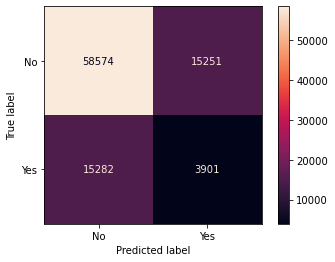

In [22]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

plot_confusion_matrix(baseline, X_train_KNNI, y_train, cmap='rocket');

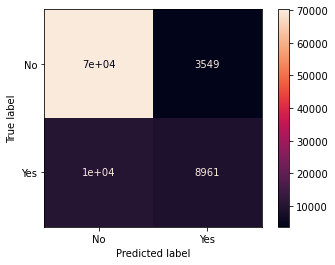

In [24]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
plot_confusion_matrix(logreg_model, X_train_scaled, y_train, cmap='rocket');


Accuracy
Baseline: 0.672 
Recall
Baseline: 0.203 
Precision
Baseline: 0.204 
F1 Score
Baseline: 0.204 



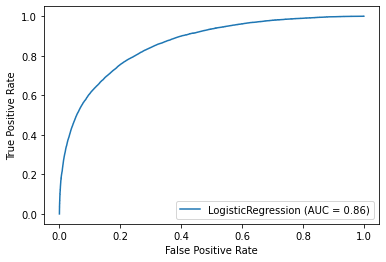

In [25]:
plot_roc_curve(logreg_model, X_train_KNNI, y_train);
baseline_accuracy = accuracy_score(y_train, baseline.predict(X_train_KNNI))
baseline_recall = recall_score(y_train, baseline.predict(X_train_KNNI),pos_label="Yes")
baseline_precision = precision_score(y_train, baseline.predict(X_train_KNNI),pos_label="Yes")
baseline_f1 = f1_score(y_train, baseline.predict(X_train_KNNI),pos_label="Yes")
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} 
Recall
Baseline: {baseline_recall:1.3f} 
Precision
Baseline: {baseline_precision:1.3f} 
F1 Score
Baseline: {baseline_f1:1.3f} 
""")


Accuracy
Simple Linear Regression: 0.852 
Recall
Simple Linear Regression: 0.467 
Precision
Simple Linear Regression: 0.716 
F1 Score
Simple Linear Regression: 0.565 



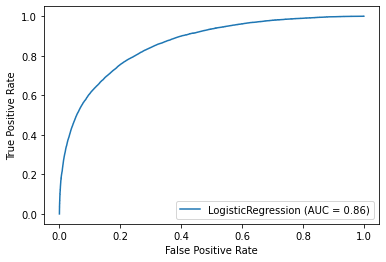

In [26]:
plot_roc_curve(logreg_model, X_train_scaled, y_train);
logreg_model_accuracy = accuracy_score(y_train, logreg_model.predict(X_train_scaled))
logreg_model_recall = recall_score(y_train, logreg_model.predict(X_train_scaled),pos_label="Yes")
logreg_model_precision = precision_score(y_train, logreg_model.predict(X_train_scaled),pos_label="Yes")
logreg_model_f1 = f1_score(y_train, logreg_model.predict(X_train_scaled),pos_label="Yes")
print(f"""
Accuracy
Simple Log Regression: {logreg_model_accuracy:1.3f} 
Recall
Simple Log Regression: {logreg_model_recall:1.3f} 
Precision
Simple Log Regression: {logreg_model_precision:1.3f} 
F1 Score
Simple Log Regression: {logreg_model_f1:1.3f} 
""")

In [27]:
print('Raw counts: \n')
print(y_train.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_train.value_counts(normalize=True))

Raw counts: 

No     73825
Yes    19183
Name: RainTomorrow, dtype: int64
-----------------------------------
Normalized counts: 

No     0.793749
Yes    0.206251
Name: RainTomorrow, dtype: float64


In [28]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)

In [29]:
print('Original class distribution: \n')
print(y_train.value_counts())
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

No     73825
Yes    19183
Name: RainTomorrow, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

No     73825
Yes    73825
Name: RainTomorrow, dtype: int64


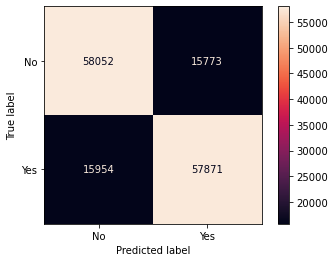

In [30]:
SMOTE_model = LogisticRegression(random_state=42, max_iter=1000)
SMOTE_model.fit(X_train_resampled, y_train_resampled)
plot_confusion_matrix(SMOTE_model, X_train_resampled, y_train_resampled, cmap='rocket');

In [44]:
corr = X_train_scaled.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='rocket', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))


Accuracy
SMOTE Model: 0.709 
Recall
SMOTE Model: 0.466 
Precision
SMOTE Model: 0.906 
F1 Score
SMOTE Model: 0.616 



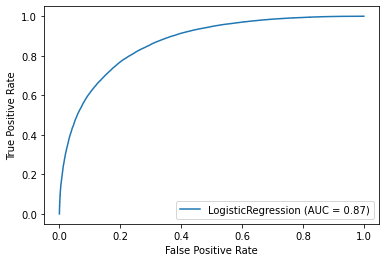

In [31]:

plot_roc_curve(SMOTE_model, X_train_resampled, y_train_resampled);
SMOTE_model_accuracy = accuracy_score(y_train_resampled, logreg_model.predict(X_train_resampled))
SMOTE_model_recall = recall_score(y_train_resampled, logreg_model.predict(X_train_resampled),pos_label="Yes")
SMOTE_model_precision = precision_score(y_train_resampled, logreg_model.predict(X_train_resampled),pos_label="Yes")
SMOTE_model_f1 = f1_score(y_train_resampled, logreg_model.predict(X_train_resampled),pos_label="Yes")
print(f"""
Accuracy
SMOTE Model: {SMOTE_model_accuracy:1.3f} 
Recall
SMOTE Model: {SMOTE_model_recall:1.3f} 
Precision
SMOTE Model: {SMOTE_model_precision:1.3f} 
F1 Score
SMOTE Model: {SMOTE_model_f1:1.3f} 
""")

In [48]:
dt = DecisionTreeClassifier(max_depth=5)
dts = DecisionTreeClassifier()

dt.fit(X_train_scaled, y_train)
dts.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

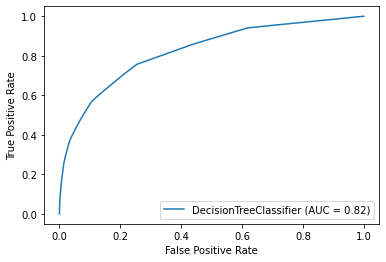

In [50]:
#max depth=5
plot_roc_curve(dt, X_train_scaled, y_train);

In [59]:
param_grid = {
    "max_depth": [3,5,10,15,20],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

grid_cv = GridSearchCV(dt, param_grid, scoring='roc_auc', n_jobs=-1, cv=3).fit(X_train_scaled, y_train)

print('Param for GS', grid_cv.best_params_)
print('CV score for GS', grid_cv.best_score_)
print('----------------')
print('Train AUC ROC score for GS: ', roc_auc_score(y_train, grid_cv.predict(X_train_scaled)))
#print('Test AUC ROC score for GS: ', roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
CV score for GS 0.8184680645360117
----------------


ValueError: could not convert string to float: 'No'

In [56]:
grid_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

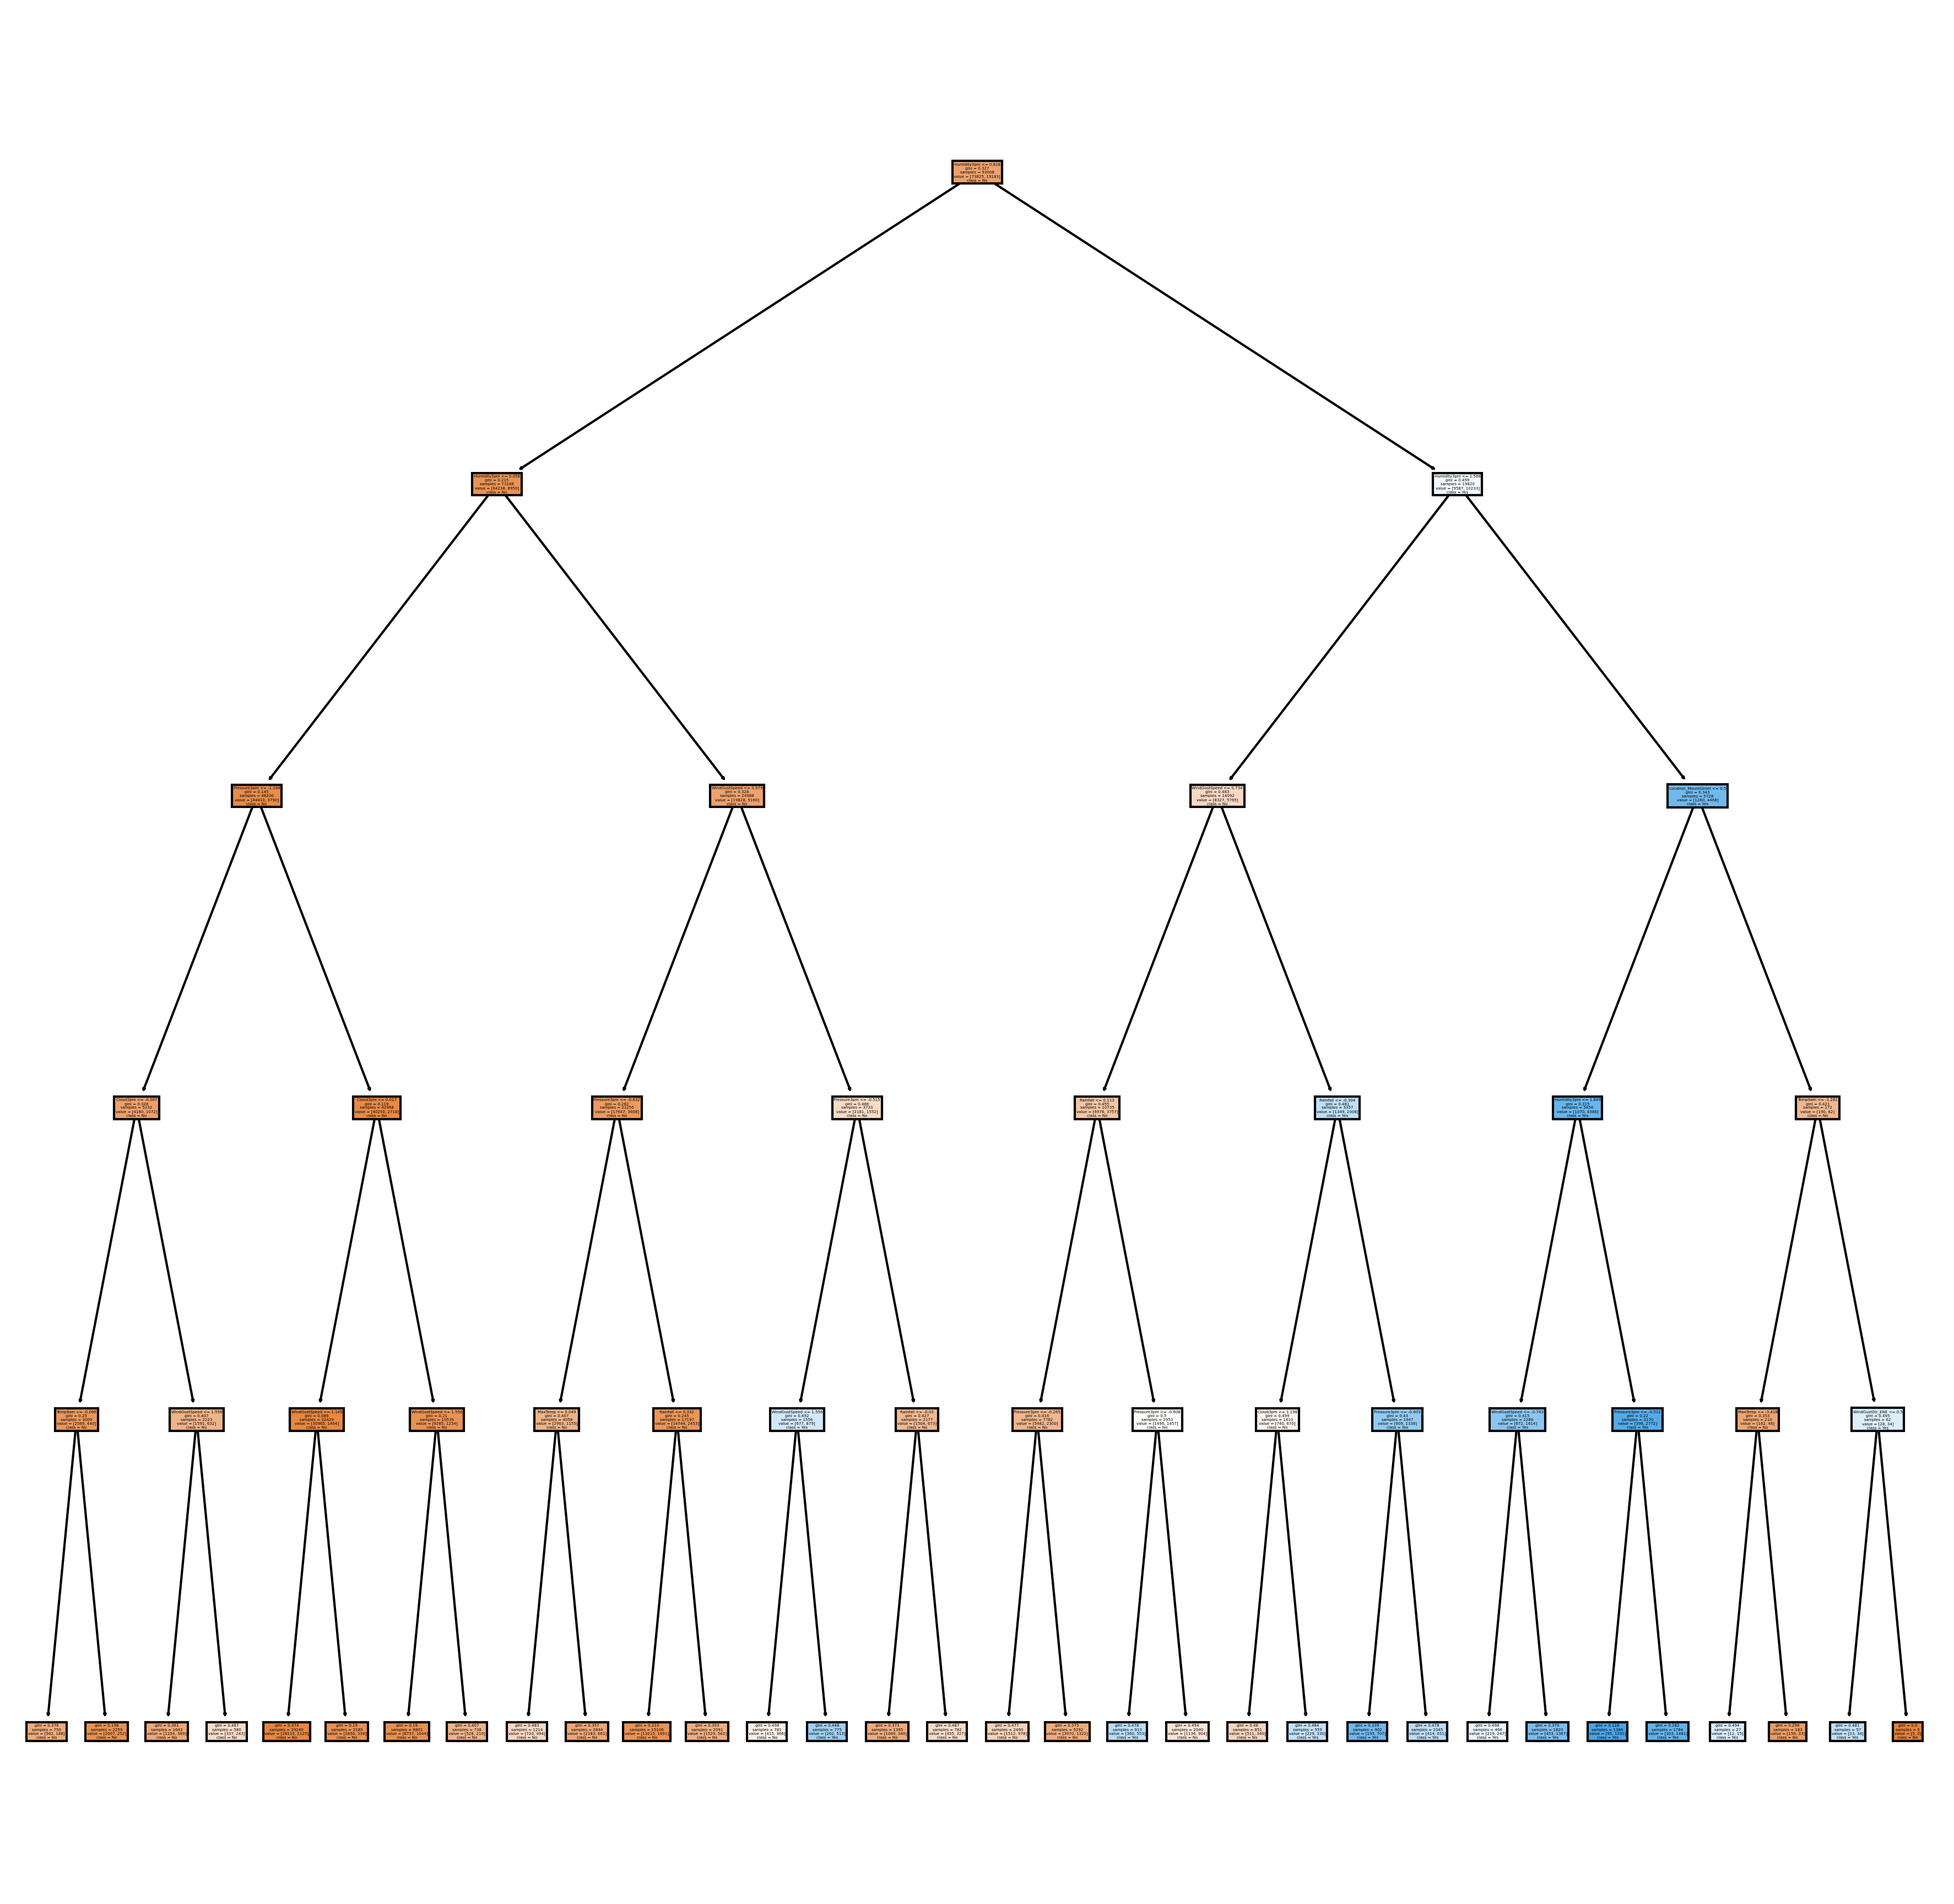

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(dt,
               feature_names = X_train_scaled.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

In [58]:
cv = cross_val_score(dt, X_train_scaled, y_train, cv=3)
cv

array([0.84453117, 0.83824146, 0.83952648])

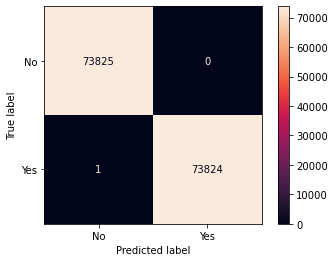

In [43]:
plot_confusion_matrix(dts, X_train_resampled, y_train_resampled, cmap='rocket')

In [ ]:
plot_confusion_matrix(dt, X_train_scaled, y_train, cmap='rocket')

In [35]:
dts_model_accuracy = accuracy_score(y_train_resampled, dts.predict(X_train_resampled))
dts_model_recall = recall_score(y_train_resampled, dts.predict(X_train_resampled),pos_label="Yes")
dts_model_precision = precision_score(y_train_resampled, dts.predict(X_train_resampled),pos_label="Yes")
dts_model_f1 = f1_score(y_train_resampled, dts.predict(X_train_resampled),pos_label="Yes")
print(f"""
Accuracy
decision tree smote Model: {dts_model_accuracy:1.3f} 
Recall
decision tree smote Model: {dts_model_recall:1.3f} 
Precision
decision tree smote Model: {dts_model_precision:1.3f} 
F1 Score
decision tree smote Model: {dts_model_f1:1.3f} 
""")


Accuracy
decision tree smote Model: 1.000 
Recall
decision tree smote Model: 1.000 
Precision
decision tree smote Model: 1.000 
F1 Score
decision tree smote Model: 1.000 



In [38]:
dt_model_accuracy = accuracy_score(y_train, dt.predict(X_train_scaled))
dt_model_recall = recall_score(y_train, dt.predict(X_train_scaled),pos_label="Yes")
dt_model_precision = precision_score(y_train, dt.predict(X_train_scaled),pos_label="Yes")
dt_model_f1 = f1_score(y_train, dt.predict(X_train_scaled),pos_label="Yes")
print(f"""
Accuracy
decision tree Model: {dt_model_accuracy:1.3f} 
Recall
decision tree Model: {dt_model_recall:1.3f} 
Precision
decision tree Model: {dt_model_precision:1.3f} 
F1 Score
decision tree Model: {dt_model_f1:1.3f} 
""")


Accuracy
decision tree Model: 1.000 
Recall
decision tree Model: 1.000 
Precision
decision tree Model: 1.000 
F1 Score
decision tree Model: 1.000 



## DO NOT ATTEMPT WARNING

In [ ]:
# KNN = KNeighborsClassifier()

# KNN.fit(X_train_scaled, y_train)

In [ ]:
# KNN_accuracy = accuracy_score(y_train, KNN.predict(X_train_scaled))
# KNN_recall = recall_score(y_train, KNN.predict(X_train_scaled),pos_label="Yes")
# KNN_precision = precision_score(y_train, KNN.predict(X_train_scaled),pos_label="Yes")
# KNN_model_f1 = f1_score(y_train, KNN.predict(X_train_scaled),pos_label="Yes")

# print(f"""
# Accuracy
# KNN Model: {KNN_model_accuracy:1.3f} 
# Recall
# KNN Model: {KNN_model_recall:1.3f} 
# Precision
# KNN Model: {KNN_model_precision:1.3f} 
# F1 Score
# KNN Model: {KNN_model_f1:1.3f} 
# """)